# CREDIT CARD CUSTOMER SEGMENTATION

# About Dataset
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

# Library Import

In [95]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Data Load

In [96]:
df=pd.read_csv(r"C:\Users\Mcc\Documents\BankChurners.csv")

In [3]:

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Columns Description
1.Clientnum:Client number .Unique Identifier for the customer holding the account

2.Attrition Flag :Internal event customer activity like Existing and Attrited customer

3.Customer Age: Customers Age in Years

4.Gender : M=Male,F=Female

5.Dependent count: Number of dependents

6.Education Level: Education Qualification of the account holder such as (high_school,college etc.)

7.Marital Status: Married , Single, Unknown

8.Income Category: Annual Income category of the account holder such as (<40K,40k-60k,60k-80k,80k-120k,unknown)

9.Card Category: type of Card Like Blue,Silver,Gold ,Platinum

10.Months_on_book : Months on book Time of Relationship

11.Total_RelationShip_count : Total no.of products held by the customers

12.Months_Inactive_12_mon : no of months in the last 12 months 

13.Contacts_Counts_12_mon: no of contacts in the last 12 months

14.Credit_limit: Credit_limit on the Credit_Card

15.Total_Revolving_Balance : Total Revolving_Balance on the Credit Card

16.Average_Open_to_Buy : Opne to Buy credit line (average of last 12 months)

17.Total amount change quarter_4 to Quarter_1: Change in Transaction amount(Q4_Q1)

18.Total_Transaction Amount : Total Transaction amount last in 12 months

19.Total Transaction category : Total Transaction Count last in 12 months

20.Total Category Change Q4 to Q1 : Change in Transaction count (Q4_Q1)

21 .Average Utilization Ration : Average Card Utilization Ration


In [4]:
# check Shape in dataset
df.shape

(10127, 23)

# Basic Cleaning


check null values

check duplicate values

check dtypes columns

droping columns in the datasets

check unique values in datasets

check outliers in datasets




In [5]:
# drop columns
df = df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
             "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],axis=1)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# check unique values each columns
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
# check unique values in the datasets

print("numberofrecords:{}".format(len(df)))


print('numberofuniquerecords:{}'.format(len(df.CLIENTNUM.unique())))

numberofrecords:10127
numberofuniquerecords:10127


In [9]:
# check columns names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
# check null values 
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# remove null values
df=df.dropna()

In [12]:
# check duplicate values
df.duplicated().sum()

0

In [13]:
# check dtypes each columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [14]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
# Summary Stats
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# EDA

In [98]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [100]:
df[['Attrition_Flag','Gender']].value_counts()

Attrition_Flag     Gender
Existing Customer  F         4428
                   M         4072
Attrited Customer  F          930
                   M          697
dtype: int64

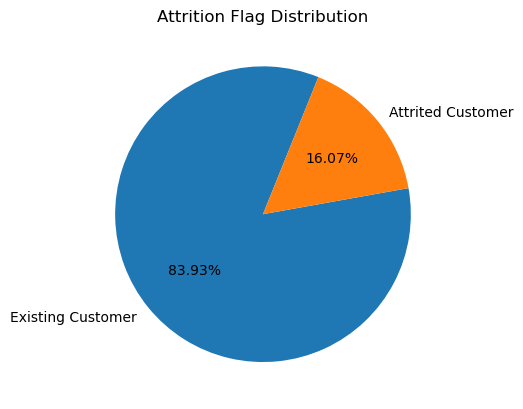

In [16]:
x = df['Attrition_Flag'].value_counts().index
y = df['Attrition_Flag'].value_counts().values
plt.pie(y, labels=x, startangle=68, autopct='%0.2f%%')
plt.title('Attrition Flag Distribution')
plt.show()


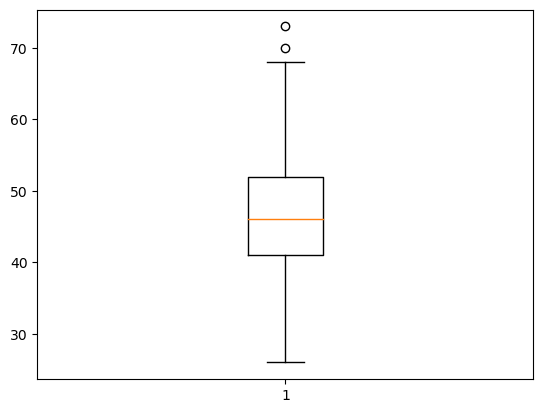

In [17]:
# check outliers
plt.boxplot(df['Customer_Age']);

# 2 Gender

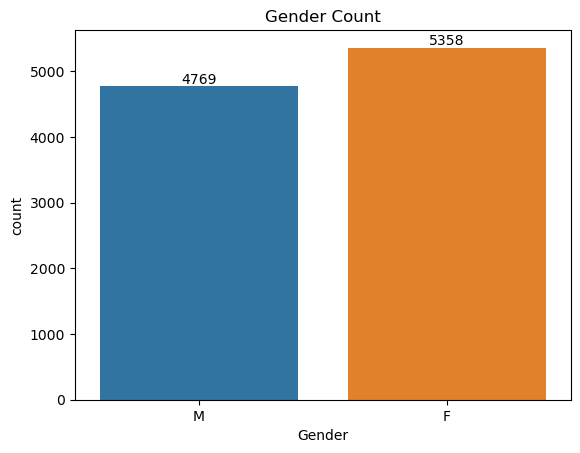

In [18]:
ax = sns.countplot(data=df, x='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Count')
plt.show()

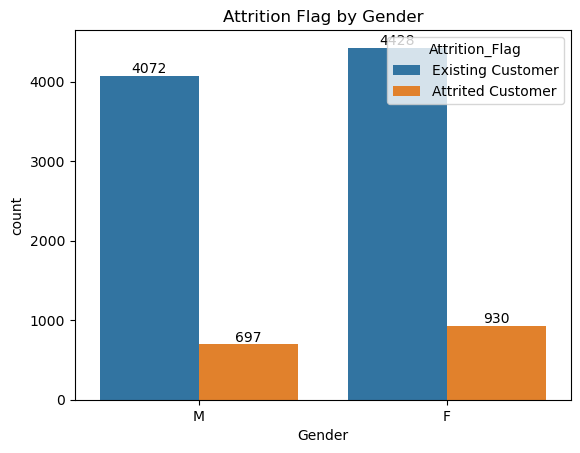

In [19]:
ax=sns.countplot(data=df,x='Gender',hue='Attrition_Flag')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Attrition Flag by Gender')
plt.show()

# 3 Education Level

In [20]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [21]:
df = df.drop(df[df['Education_Level']=='Unknown'].index)

Text(0.5, 1.0, 'Education Level count')

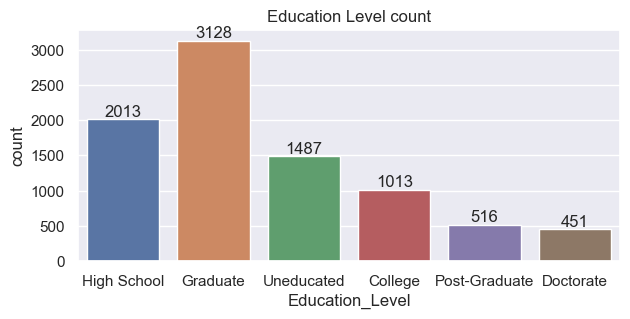

In [22]:
sns.set(rc={'figure.figsize':(7,3)})
ax=sns.countplot(x='Education_Level',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Education Level count')    

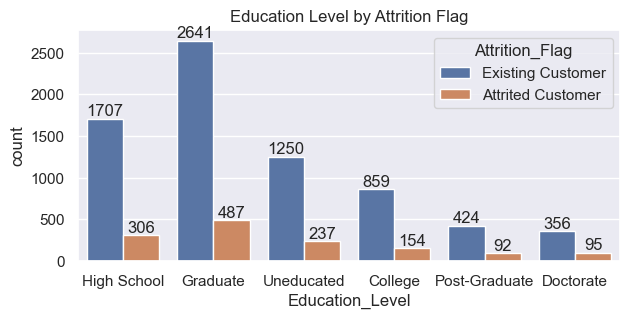

In [23]:
ax=sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Education Level by Attrition Flag') 
plt.show()

# 3 Marital Status

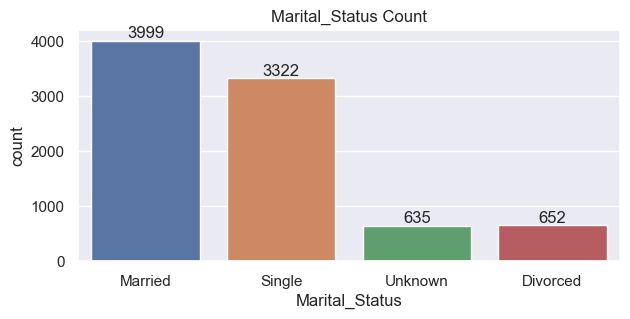

In [24]:
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital_Status Count') 
plt.show()

In [25]:
df = df.drop(df[df['Marital_Status']=='Unknown'].index)

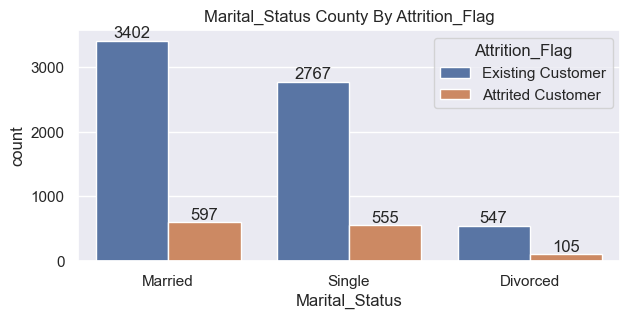

In [26]:
ax = sns.countplot(x='Marital_Status',hue='Attrition_Flag',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital_Status County By Attrition_Flag')  
plt.show()

# Income Category

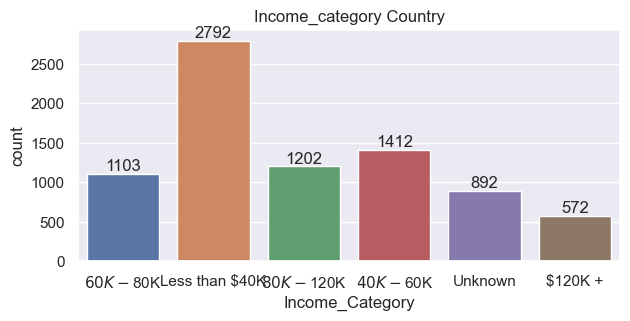

In [27]:
ax=sns.countplot(x='Income_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Income_category Country')  
plt.show()

In [28]:
df = df.drop(df[df['Income_Category']=='Unknown'].index)

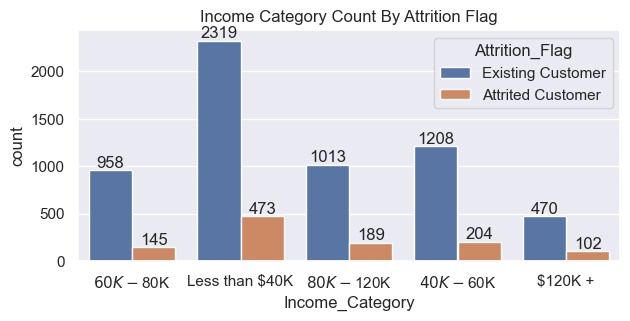

In [29]:
ax=sns.countplot(x='Income_Category',hue='Attrition_Flag',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Income Category Count By Attrition Flag')    
plt.show()

# Card Category

Text(0.5, 1.0, 'Card_Category By Each Card Cagetory')

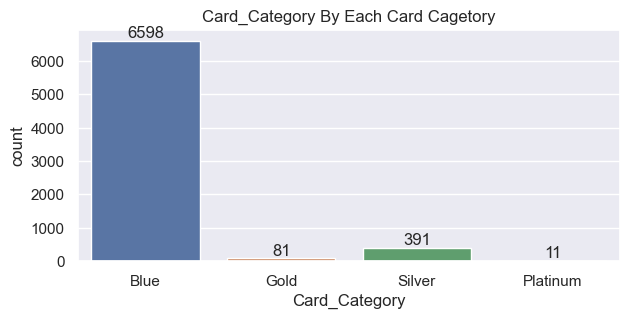

In [30]:
ax= sns.countplot(data=df,x='Card_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Card_Category By Each Card Cagetory')    

In [31]:
df = df.drop(df[df['Card_Category']=='Platinum'].index)

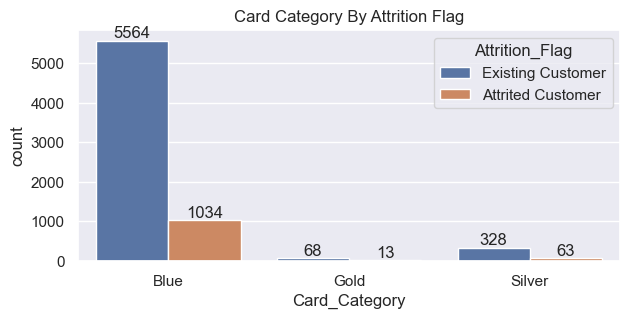

In [32]:
ax = sns.countplot(x='Card_Category',hue='Attrition_Flag',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Card Category By Attrition Flag') 
plt.show()

Text(0.5, 1.0, 'Dependent Count')

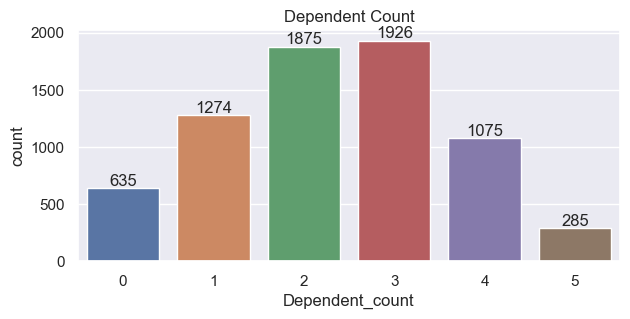

In [33]:
ax = sns.countplot(x='Dependent_count',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Dependent Count')    

Text(0.5, 1.0, 'Total_Relationship_Count by Attrition Flag')

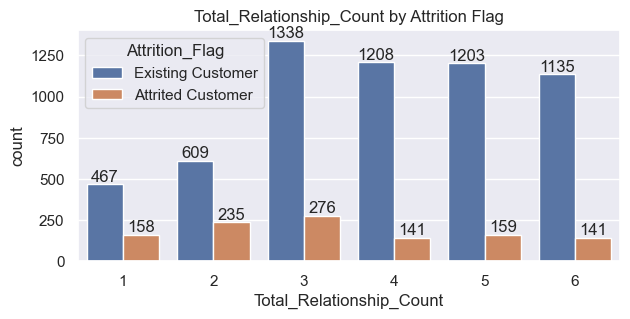

In [34]:
ax = sns.countplot(x='Total_Relationship_Count',hue='Attrition_Flag',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Total_Relationship_Count by Attrition Flag')    

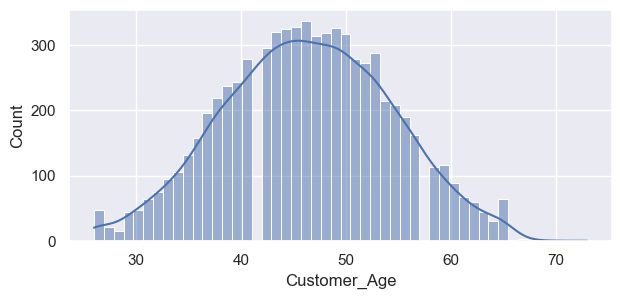

In [35]:
sns.histplot(data=df,x='Customer_Age',kde = True,bins=50)
plt.show()

In [36]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [37]:
# Columns name rename 
df.rename(columns={'Attrition_Flag':'Target','Customer_Age':'Age','Months_on_book':'opening_month'},inplace=True
         )

C:\Users\Mcc\AppData\Local\Temp\ipykernel_14052\791426744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


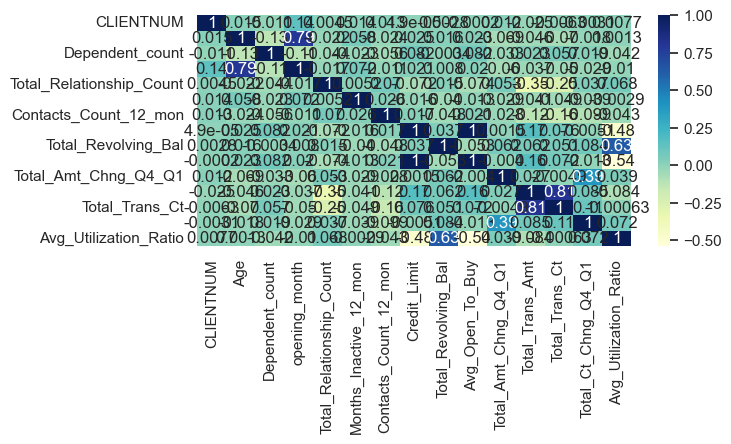

In [38]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

In [39]:
# Drop Columns
df1=df.drop(columns=['Total_Trans_Amt','Avg_Open_To_Buy','CLIENTNUM'],axis=1)

In [40]:
df1.head()

,Target,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,opening_month,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,20,2.333,0.000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1.376,24,0.846,0.311


In [41]:
# Convert Data types in Numerical Values
df['Target']=df['Target'].replace(['Existing Customer','Attrited Customer'],['0','1'])

df['Income_Category']=df['Income_Category'].replace(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                                                     ['1','2','3','4','5'])
df['Marital_Status']=df['Marital_Status'].replace(['Married','Single','Divorced'],
                                                     ['2','1','3'])
df['Card_Category']=df['Card_Category'].replace(['Blue','Silver','Gold'],
                                                     ['1','2','3'])
df['Gender']=df['Gender'].replace(['M','F'],['1','0'])

In [42]:
# create Target Variable
df1['Target'].value_counts()

Existing Customer    5960
Attrited Customer    1110
Name: Target, dtype: int64

In [43]:
df1['Target']=df1['Target'].replace(['Existing Customer','Attrited Customer'],['0','1'])

In [44]:
df1['Target'].value_counts()

0    5960
1    1110
Name: Target, dtype: int64

In [45]:
df1['Education_Level']=df1['Education_Level'].replace(['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate'],
                                                     ['1','2','3','4','5','6'])

In [46]:
df1['Education_Level'].value_counts()

1    2587
2    1652
3    1202
4     844
5     429
6     356
Name: Education_Level, dtype: int64

In [47]:
df1['Marital_Status'].value_counts()

Married     3558
Single      2943
Divorced     569
Name: Marital_Status, dtype: int64

In [48]:
df1['Marital_Status']=df1['Marital_Status'].replace(['Married','Single','Divorced'],
                                                     ['2','1','3'])

In [49]:
df1['Income_Category'].value_counts()

Less than $40K    2789
$40K - $60K       1411
$80K - $120K      1202
$60K - $80K       1100
$120K +            568
Name: Income_Category, dtype: int64

In [50]:
df1['Income_Category']=df1['Income_Category'].replace(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                                                     ['1','2','3','4','5'])

In [51]:
df1['Card_Category'].value_counts()

Blue      6598
Silver     391
Gold        81
Name: Card_Category, dtype: int64

In [52]:
df1['Card_Category']=df1['Card_Category'].replace(['Blue','Silver','Gold'],
                                                     ['1','2','3'])

In [53]:
df1.head(1)

,Target,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,opening_month,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2,2,3,1,39,5,1,3,12691.0,777,1.335,42,1.625,0.061


In [54]:
df1['Gender']=df1['Gender'].replace(['M','F'],['1','0'])

In [55]:
df1.head(1)

,Target,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,opening_month,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,1.335,42,1.625,0.061


# Create X and y datasets

In [56]:
x=df1.iloc[:,2:]
y=df1.iloc[:,:1]

In [57]:
x.head()

,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,opening_month,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,3,2,2,3,1,39,5,1,3,12691.0,777,1.335,42,1.625,0.061
1,0,5,1,1,1,1,44,6,1,2,8256.0,864,1.541,33,3.714,0.105
2,1,3,1,2,4,1,36,4,1,0,3418.0,0,2.594,20,2.333,0.000
4,1,3,3,2,3,1,21,5,1,0,4716.0,0,2.175,28,2.500,0.000
5,1,2,1,2,2,1,36,3,1,2,4010.0,1247,1.376,24,0.846,0.311


In [58]:
y.head()

,Target
0,0
1,0
2,0
4,0
5,0


# Create Train and Test Data

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y, test_size=0.20,random_state=5)

In [60]:
print('Training Data Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Data Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Data Shape: (5656, 16)
Training Labels Shape: (5656, 1)
Testing Data Shape: (1414, 16)
Testing Labels Shape: (1414, 1)


# Model

# Define the logistic regression model and fit that model

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Mcc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mcc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Check the model coefficients

In [63]:
pd.DataFrame({'feature': model.feature_names_in_.tolist(), 'coef': model.coef_[0].tolist()})

,feature,coef
0,Gender,-0.118977
1,Dependent_count,0.205080
2,Education_Level,0.067054
3,Marital_Status,0.024287
4,Income_Category,-0.077596
5,Card_Category,0.132089
6,opening_month,0.019949
7,Total_Relationship_Count,-0.461815
8,Months_Inactive_12_mon,0.546945
9,Contacts_Count_12_mon,0.519761


In [64]:
model.intercept_

array([0.07723711])

# Check the accuracy of trained model

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [66]:
train_acc = model.score(x_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 88.91442715700141


In [67]:
y_pred = model.predict(x_test)
probs = model.predict_proba(x_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 87.12871287128714


In [68]:
y_pred_probs

array([0.04365068, 0.07407345, 0.0802998 , ..., 0.02069751, 0.14422023,
       0.11140832])

# Check the confusion matrix

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1166
           1       0.77      0.38      0.51       248

    accuracy                           0.87      1414
   macro avg       0.82      0.68      0.72      1414
weighted avg       0.86      0.87      0.85      1414



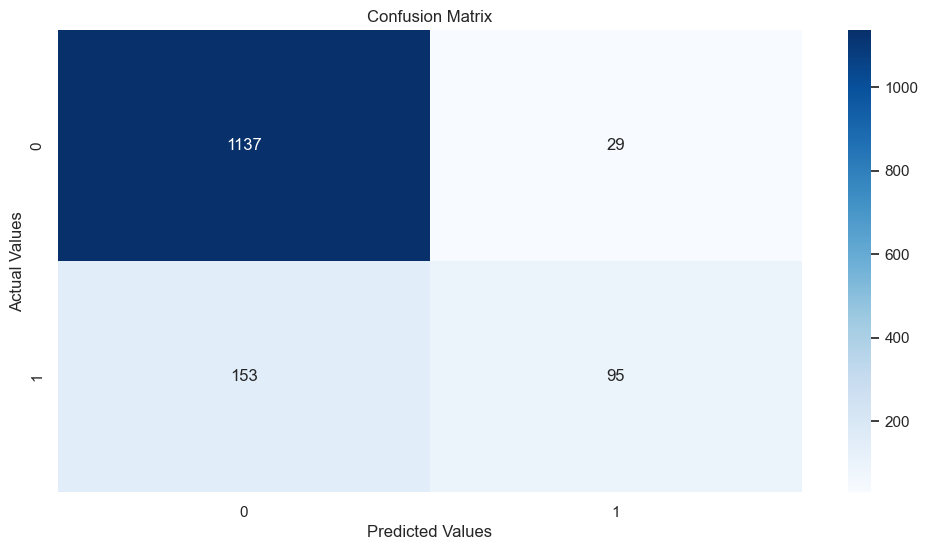

In [70]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# Plot ROC curve

In [71]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs,pos_label='1')
test_roc_auc = auc(test_fpr, test_tpr)

In [72]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(x_train)[:, 1],pos_label='1')
train_roc_auc = auc(train_fpr, train_tpr)

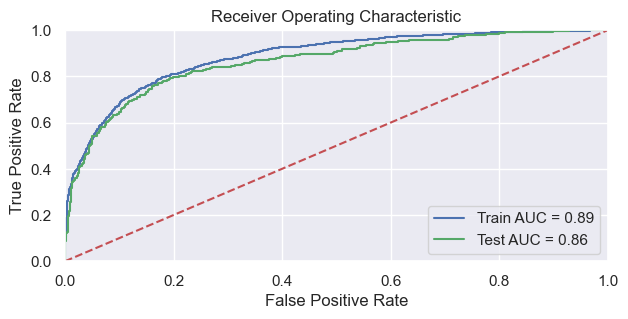

In [73]:

plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [74]:
from sklearn import tree

In [75]:
dtree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

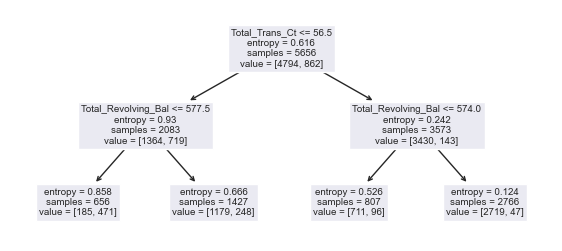

In [76]:
tree.plot_tree(dtree, feature_names=x_train.columns.tolist())
plt.show()

# Check the accuracy of trained model

In [77]:
train_acc = dtree.score(x_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 89.81612446958982


In [78]:
y_pred = dtree.predict(x_test)
probs = dtree.predict_proba(x_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 86.77510608203679


# Check the confusion matrix

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1166
           1       0.69      0.45      0.54       248

    accuracy                           0.87      1414
   macro avg       0.79      0.70      0.73      1414
weighted avg       0.86      0.87      0.86      1414



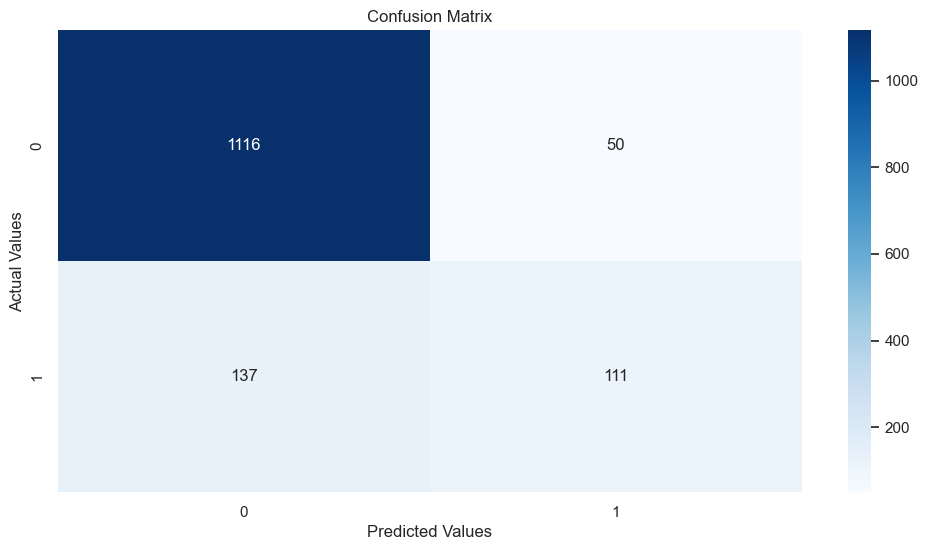

In [80]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# Plot ROC curve

In [81]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs,pos_label='1')
test_roc_auc = auc(test_fpr, test_tpr)

In [82]:
train_fpr, train_tpr, threshold = roc_curve(y_train, dtree.predict_proba(x_train)[:, 1],pos_label='1')
train_roc_auc = auc(train_fpr, train_tpr)

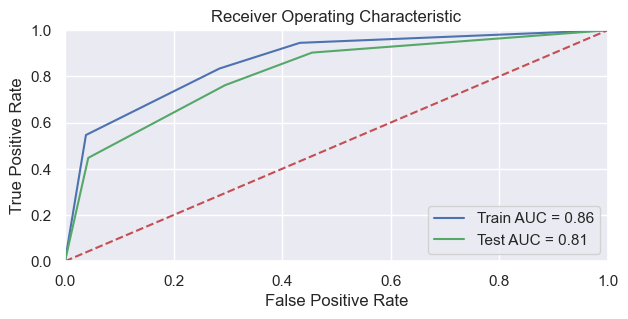

In [83]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest Model and Fit

In [85]:
model = RandomForestClassifier(n_estimators=50, random_state=2023,
                               max_features=10, max_depth=5,
                               min_samples_split=int(x_train.shape[0]/10),
                               bootstrap=True, oob_score=True
                              )
model.fit(x_train, y_train)

C:\Users\Mcc\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, max_features=10, min_samples_split=565,
                       n_estimators=50, oob_score=True, random_state=2023)

In [86]:
# Print Accuracy metrics on OOB Sample
model.oob_score_

0.9054101838755304

In [87]:
#  Print AUC metric on OOB sample
oob_fpr, oob_tpr, threshold = roc_curve(y_train, model.oob_decision_function_[:, 1],pos_label='1')
oob_roc_auc = auc(oob_fpr, oob_tpr)
oob_roc_auc

0.912786865252099

# Check the accuracy of model

In [88]:
train_acc = model.score(x_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 90.92998585572843


In [89]:
y_pred = model.predict(x_test)
probs = model.predict_proba(x_test)
y_pred_probs = probs[:,1]
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 88.75530410183875


# Check the confusion matrix

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1166
           1       0.74      0.56      0.63       248

    accuracy                           0.89      1414
   macro avg       0.82      0.76      0.78      1414
weighted avg       0.88      0.89      0.88      1414



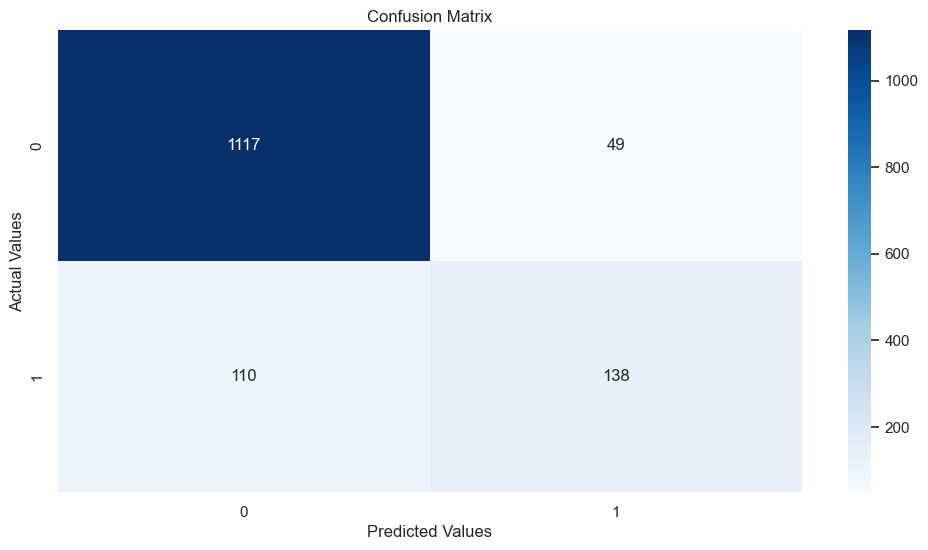

In [91]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# Plot ROC Curve

In [92]:
test_fpr, test_tpr, threshold = roc_curve(y_test, y_pred_probs,pos_label='1')
test_roc_auc = auc(test_fpr, test_tpr)

In [93]:
train_fpr, train_tpr, threshold = roc_curve(y_train, model.predict_proba(x_train)[:, 1],pos_label='1')
train_roc_auc = auc(train_fpr, train_tpr)

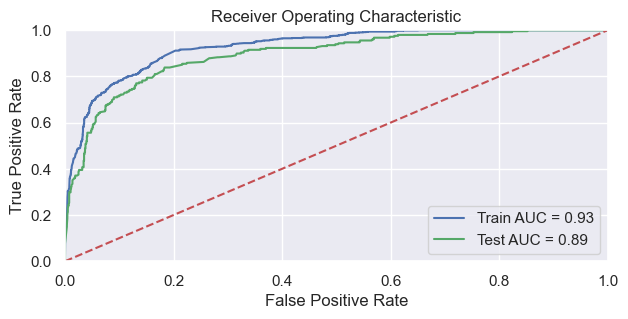

In [94]:
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()